# Проведение А/В-теста в интернет-магазине


**В исходных данных мы имеем три датасета**:
- датасет с 9 гипотезами для увеличения выручки указанными параметрами Reach, Impact, Confidence, Effort.
- Датасеты с результатами A/B-теста:  
  - orders - данные о заказах и выручке в группах A и B;
  - visitors - данные о количестве поситителей в группах A и B;
Имея входные данные необходимо:
 - произвести приоритизацию гипотез об увеличении выручки;
 - пранализировав основные показатели групп теста и сформулировав гипотезы о средних значениях выручки и заказах в групах, сделать вывод об успешности проведения A/B теста(улучшении основных показателей выручки и количества заказов группы B по сравнению с группой A) 

**План исследования**
1. Необходимо произвести приоритизацию гипотез с помощью с помощью фреймворков:
- ICE
- RICE  

Проанлизировать результаты приоритизации в зависимости от применения фремворков.

2. Произвести анализ A/B-теста:
- построить и проанализировать график куммулятивной вырчки по группам теста;
- построить и проанализировать график куммулятивного среднего чека по группам;
- построить и проанализировать график относительного изменения куммулятивного среднего чека по группам теста;
- построить и проанализировать график куммулятивного среднего количества заказов на поситителя по группам;
- построить и проанализировать график относительного изменения куммулятивного среднего чека группы B к группе A;
- построить и проанализировать точечный график количества заказов по пользователям;
- расчитать 95-й и 99-й перцентили количества по пользователям, выбрать границу для определения аномальных пользователей;
- построить и проанализировать точечный график стоимости заказов.
- расчитать 95-й и 99-й перцентили стоймости заказов, выбрать границу для определения аномальныз заказов;
- посчитать и проанализировать статистическую значимость различий в среднем количестве заказов на посетителя между группами по сырым данным;
- посчитать и проанализировать статистическую значимость различий в среднем чеке между группами по сырым данным;
- посчитать и проанализировать статистическую значимость в среднем количестве заказов на поситителя между группами по отфильтрованным данным;
- посчитать статистическую значимость различий в среднем чеке между группами по отфильтрованным данным;
- По результатам A/B теста сделать вывод и предложить дальнейшие действия.

### Приоритизация гипотез

#### Импорт библиотек

In [1]:
import pandas as pd #импортируем pandas

In [2]:
import datetime as dt #импортируем datetime 

In [3]:
import  numpy as np #импортируем numpy

In [4]:
import matplotlib.pyplot as plt #импортируем matplotlib

In [5]:
import scipy.stats as stats #импортируем stats

#### Применение фреймворков к гипотезам

In [6]:
hyp = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv') #запишем датасет в hypothesis 

In [7]:
hyp.head(10) #откроем датасет

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [8]:
hyp.info()#выведим info датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
hyp.columns = hyp.columns.str.lower() #приведем наименования колонок
#к нижнему регистру

In [10]:
hyp# выведим датасет

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [11]:
hyp['ICE'] = (hyp['impact']*hyp['confidence'])/hyp['efforts']#применим фремворк ICE
hyp['ICE'] = hyp['ICE'].round(1)#округлим до 1 знака 

In [12]:
hyp['RICE'] = (hyp['reach']*hyp['impact']*hyp['confidence'])/hyp['efforts'] #применим фреймворк RICE
hyp['RICE'] = hyp['RICE'].round(1)

In [13]:
pd.set_option('display.max_colwidth', 0)

In [14]:
hyp[['hypothesis','ICE', 'RICE']].sort_values(by = ['RICE','ICE'], ascending = False) #выведим RICE

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


#### Вывод:
- применив фреймворк ICE получили, что наиболее приоритетные гипотезы №8, №0 и №7; Применив фреймворк RICE получили другие приоритеты: гипотезы №7, №2 и № 0 в приоритете. Параметр Reach вносит корректировку на охват пользователей, которых затронит данное изменение, а значит оказывает значительное влияние на приоритет гипотезы.

### Проверка результатов A/B-теста

#### Предобработка данных результатов A/B теста

In [15]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv') #запишем датасет в orders 

In [16]:
orders.head() #выведим orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
orders.info() #выведим info о orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [18]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#приведем столбец date к формату даты

In [19]:
visitors = pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv') #запишем датасет в visitors

In [20]:
visitors.head() #выведим visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors.info() #выведим инфо visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#приведем столбец data к формату даты

In [23]:
print(orders[orders['group'] == 'A']['visitorId'].nunique()) #посчитаем количество уникальных пользователей в группе A
orders[orders['group'] == 'B']['visitorId'].nunique()  #посчитаем количество уникальнхы пользователей в группе B

503


586

**Вывод**:
в датасете orders группа B больше группы A на 14%

In [24]:
 orders.duplicated().sum() #посчитаем количество явных дубликатов в orders

0

In [25]:
orders.isna().sum() # посчитаем количество пропусков в orders

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [26]:
visitors.duplicated().sum()#посчитаем количество явных дубликатов в visitors

0

In [27]:
visitors.isna().sum() #посчитаем количество пропусков в visitors

date        0
group       0
visitors    0
dtype: int64

In [28]:
group_visitors = orders.groupby('visitorId').agg({'group':'nunique'}).replace({1:'unique', 2:'common'}) #выделим пользователей
#в одну и обе группы
common_visitors = group_visitors[group_visitors['group'] == 'common'].count()#выделим пользоватей входящих в обе группы
f'количество общих пользователей для двух групп: {common_visitors}'

'количество общих пользователей для двух групп: group    58\ndtype: int64'

Общее количество пользователей для двух групп составило 58. Это составляет ~5% от общего количества пользователей в двух группах. Ужадалять этих пользователей нецелесообразно, так как они не составляют значительного количества, а также их невозможно индентифицировать в датасете visitors.

**Вывод**:    
Проведя предобработку данных:
 - привели данные колонок с датами в датасетах orders и visitors к фомату даты;
 - определили размерность групп A и B (группа B превосходит группу A на 14%);
 - проверили датасеты visitors и orders на наличие явных дубликатов;
 - опредилили количество общих пользователей для обеих групп теста и приняли решение об их оставлении.

#### Расчет куммулятивных значений выручки 

In [29]:
dategroups = orders[['date','group']].drop_duplicates() # создадим датафрейм с группами по каждой
#дате

In [30]:
dategroups.sort_values(by = 'date').head() #выведим датафрейм dateGroups

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A


In [31]:
ordersagg = dategroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionId': 'nunique',\
'visitorId':'nunique', 'revenue':'sum'}), axis = 1).\
sort_values(by=['date','group']) 
#получим куммулятивные по дням данные о заказах 

In [32]:
ordersagg.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [33]:
visitorsagg = dategroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date':'max', 'group':'max', 'visitors': 'sum'}), axis = 1).\
sort_values(by=['date','group'])
#кумулятивные по дням данные о посетителях 

In [34]:
visitorsagg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [35]:
cumdata = ordersagg.merge(visitorsagg , left_on = ['date', 'group'], right_on =['date', 'group'])
# объединяем кумулятивные данные в одной таблице

In [36]:
cumdata.head() #выведим cumdata

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [37]:
cumdata.columns = ['date', 'group', 'orders', 'buyers','revenue', 'visitors'] #переименуем столбцы в cumdata

In [38]:
cumrevA = cumdata[cumdata['group']=='A'][['date','revenue', 'orders']] #перенесем куммулятивные данные группы A в cumrevA

In [39]:
cumrevB = cumdata[cumdata['group']=='B'][['date','revenue', 'orders']] #перенесем куммулятивные данные группы B в cumrevB

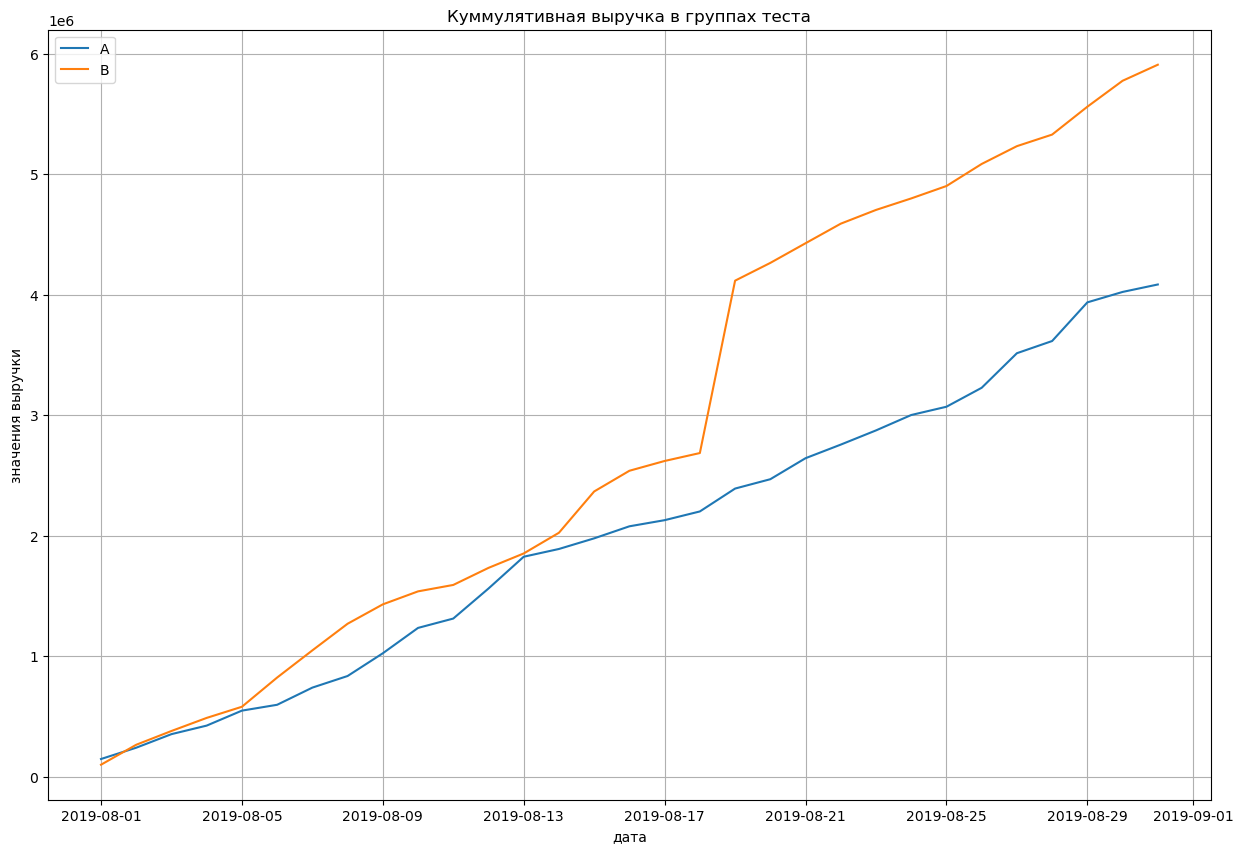

In [40]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(cumrevA['date'], cumrevA['revenue'], label='A')
plt.plot(cumrevB['date'], cumrevB['revenue'], label='B')
plt.title('Куммулятивная выручка в группах теста')
plt.xlabel('дата')
plt.ylabel('значения выручки')
plt.legend() 
plt.show()
# построим график куммулятивной выручки для групп A и B

**Вывод**: 
Выручка росла равномерно в двух группах до 17-08, затем в группе B в промежутке между 17-08 и 21-08 наблюдается резкий рост выручки, что может указывать на аномальные значения в группе B в данный период.

#### Расчет куммулятивного среднего чека

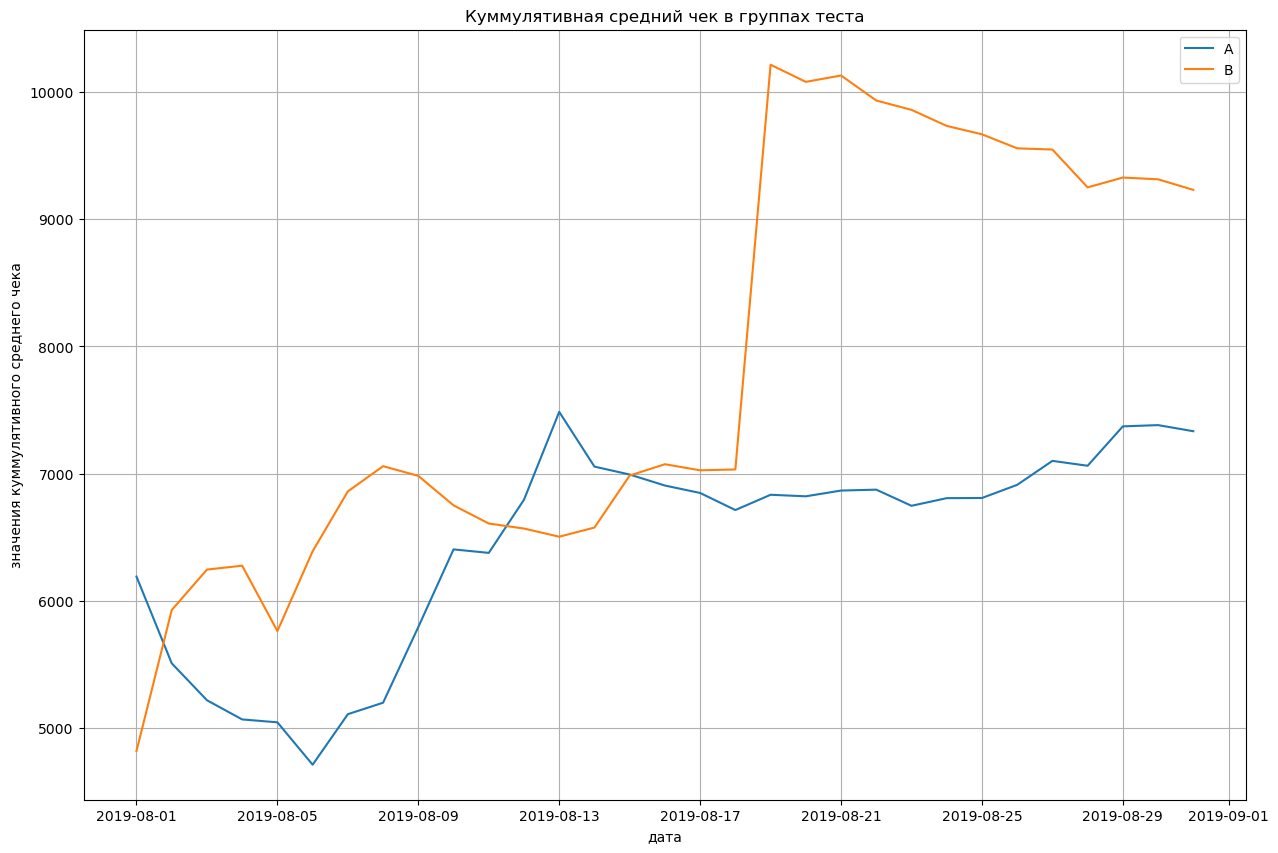

In [41]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(cumrevA['date'], cumrevA['revenue']/cumrevA['orders'], label='A')
plt.plot(cumrevB['date'], cumrevB['revenue']/cumrevB['orders'], label='B')
plt.legend()
plt.title('Куммулятивная средний чек в группах теста')
plt.xlabel('дата')
plt.ylabel('значения куммулятивного среднего чека')
plt.show()
#построим график куммулятивного среднего чека для групп

**Вывод**:
До 17-08 наблюдается колебание значение куммулятивной выручки у двух групп. В период с 17-08 до 21-08 наблюдается резкий рост в группе B, что может указывать на аномальные покупки в группе B в этот период.   
В группе A после 17-08 наблюдается постепенный медленный рост, в группе B, напротив, после резкого аномального роста наблюдается уменьшение значений среднего чека

#### Расчет относительного изменения кумулятивного среднего чека

In [42]:
mergcumrev = cumrevB.merge(cumrevA, left_on = 'date', right_on = 'date', how = 'left', suffixes =['A', 'B']) #объединим данные
#по выручке групп A и B.

In [43]:
mergcumrev.head() # выведим датафрейм

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,101217,21,148579,24
1,2019-08-02,266748,45,242401,44
2,2019-08-03,380996,61,354874,68
3,2019-08-04,489567,78,425699,84
4,2019-08-05,581995,101,549917,109


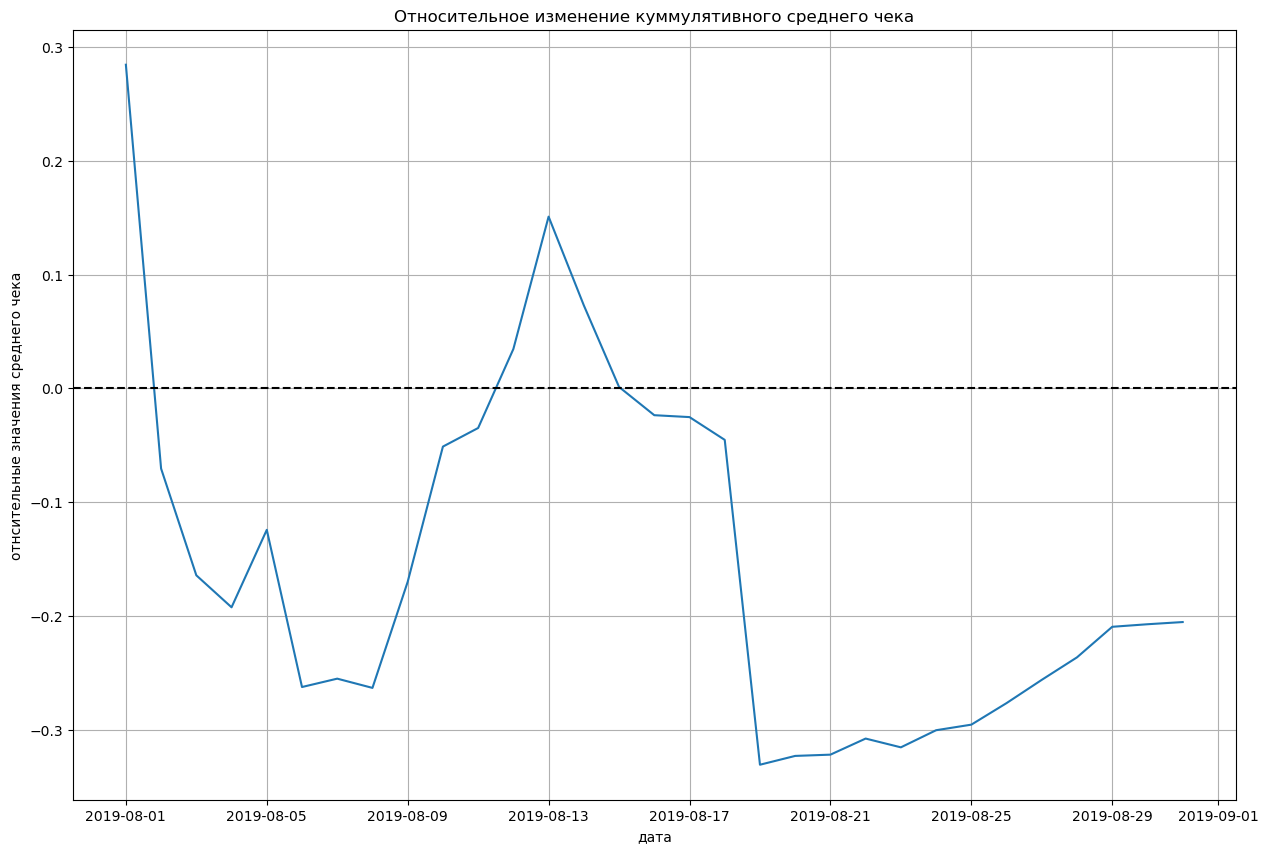

In [44]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(mergcumrev['date'], (mergcumrev['revenueB']/mergcumrev['ordersB'])/(mergcumrev['revenueA']/mergcumrev['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение куммулятивного среднего чека')
plt.xlabel('дата')
plt.ylabel('отнсительные значения среднего чека')
plt.show();
#построим график 

**Вывод:**
График относительного изменения среднего чека показывает значительный перевес в сторону группы B, особенно после вероятных аномальных покупок в период с 17-08 до 21-08

#### Расчет  количества заказов на посетителя

In [45]:
cumdata['conversion'] = cumdata['orders']/cumdata['visitors'] #расчитаем конверсию

In [46]:
cumdataA = cumdata[cumdata['group'] == 'A'] #перенесем конверсию группы A в cumdataA

In [47]:
cumdataB = cumdata[cumdata['group'] == 'B'] #перенесем конверсию группы B в cumdataB

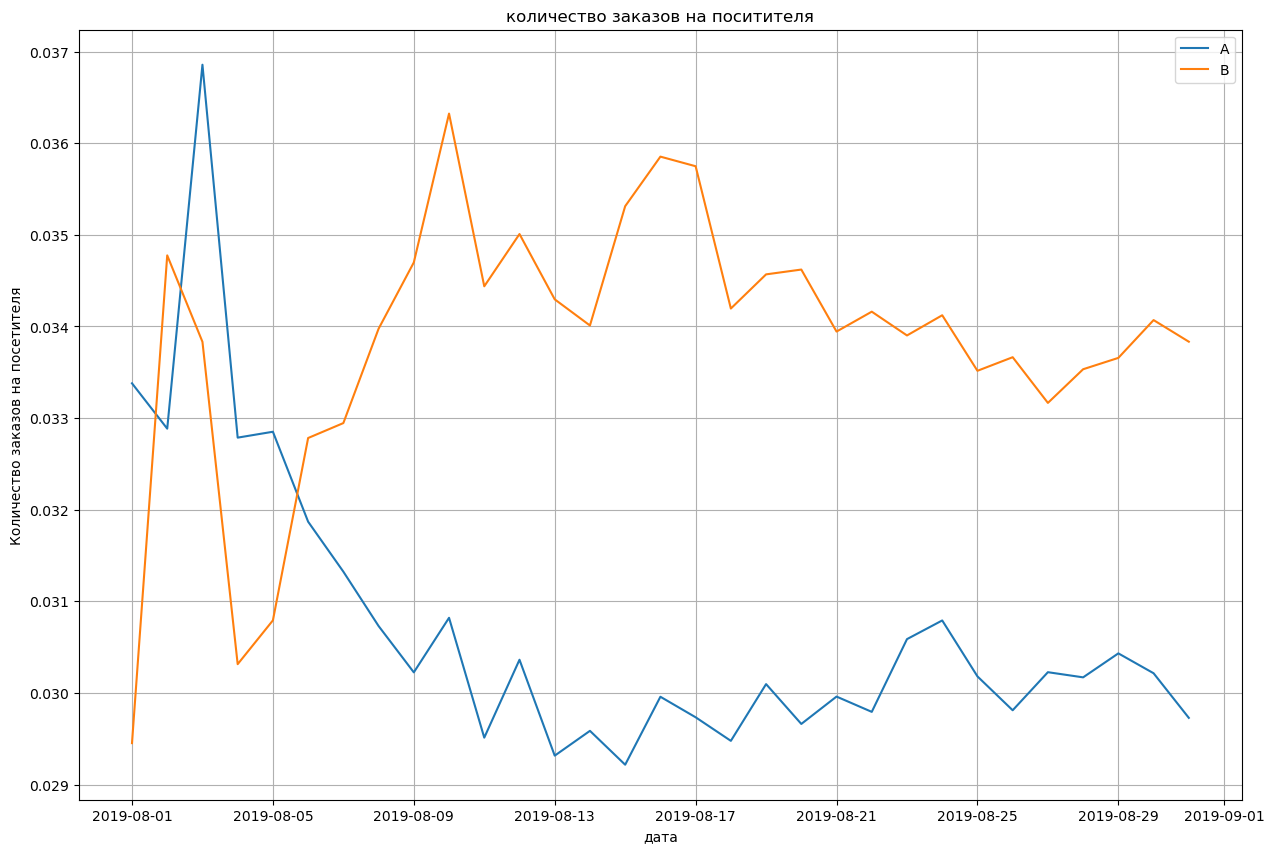

In [48]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(cumdataA['date'], cumdataA['conversion'], label='A')
plt.plot(cumdataB['date'], cumdataB['conversion'], label='B')
plt.title('количество заказов на поситителя')
plt.xlabel('дата')
plt.ylabel('Количество заказов на посетителя')
plt.legend()
plt.show();
#построим график конверсии по группам

**Вывод**:   
До 08-05 наблюдаются синхронные всплески значений количества заказов на поситителя групп A и B. После 08-05 количество заказов на посетителя группы B начала расти и к 25-08 стабилизировалось на уровне 0.034. Количество заказов на посетителя группы A напротив зеркально начало снижаться и к 17-08 стабилизировалось на уровне 0.03

#### расчет относительного изменения количества заказов на посетителя

In [49]:
mergcumconv = cumdataA[['date', 'conversion']].merge(cumdataB[['date', 'conversion']], left_on = 'date', right_on = 'date', \
how = 'left', suffixes = ['A', 'B']) #совместим датафреймы количества закзов двух групп по дате.

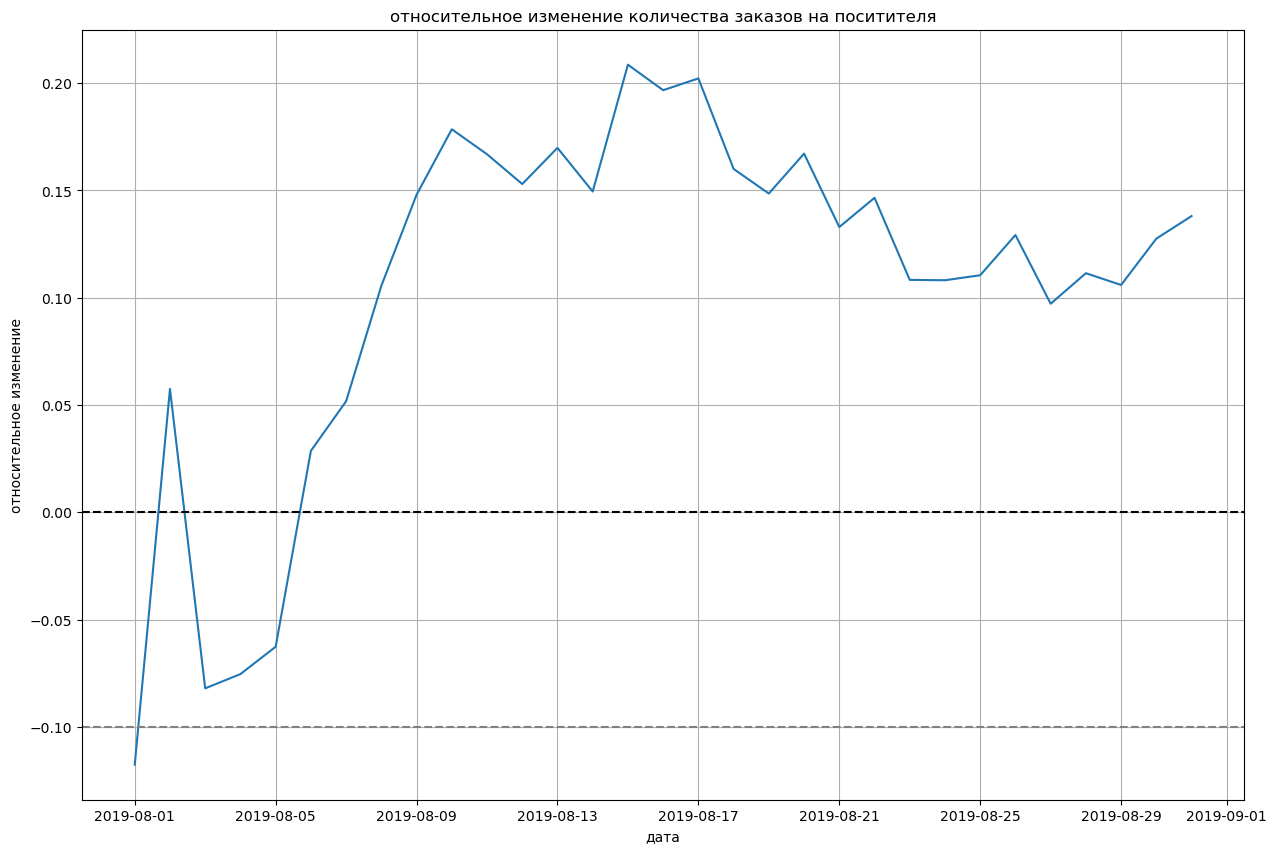

In [50]:
plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(mergcumconv['date'], mergcumconv['conversionB']/mergcumconv['conversionA']-1,\
label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('относительное изменение количества заказов на поситителя')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.show();
#построим график относительного изменения количества закзов на поситителя

**Вывод:**  
В начале теста перевес находился на стороне группы B c колебанием в сторону группы A. с 05-08 значительный перевес количества заказов на посетителя в сторону группы B. После 21-08 значение зафиксировалось в коридоре 0.1 до 0.15

#### расчет количества заказов на пользователя

In [51]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
) #сгрупируем по пользователям и посчитаем количество заказов на пользователя 

ordersByUsers.columns = ['userId', 'orders'] #переименуем столбцы

ordersByUsers.sort_values(by='orders', ascending=False).head(10) #отсортируем значения по убыванию

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


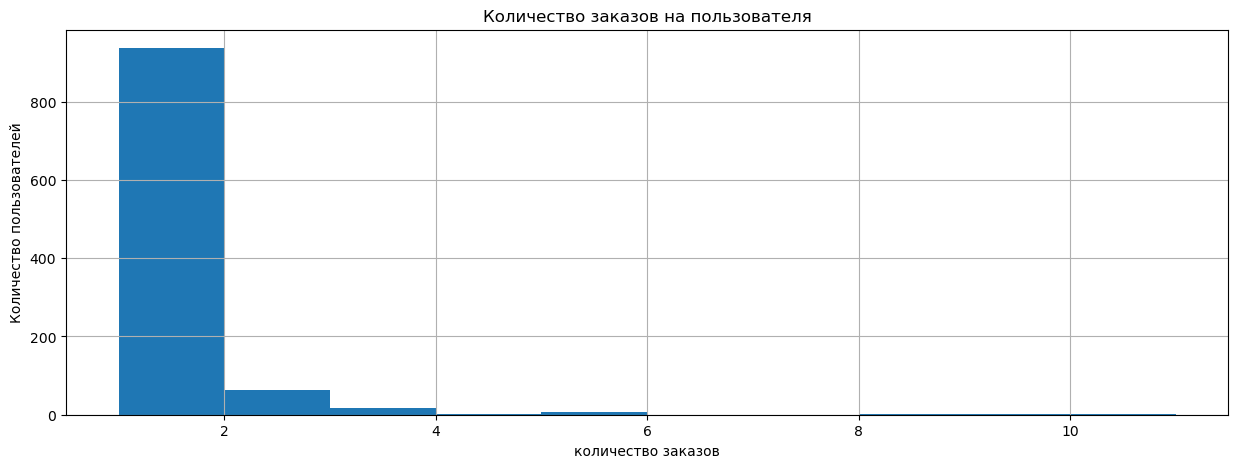

In [83]:
plt.figure(figsize =(15,5))
plt.grid(True)
plt.hist(ordersByUsers['orders'])
plt.title('Количество заказов на пользователя')
plt.xlabel('количество заказов')
plt.ylabel('Количество пользователей')
plt.show();

Большинство пользователей заказали менее 2 заказов. Так же значительное количество пользователей заказало от 2 до 4 заказов.

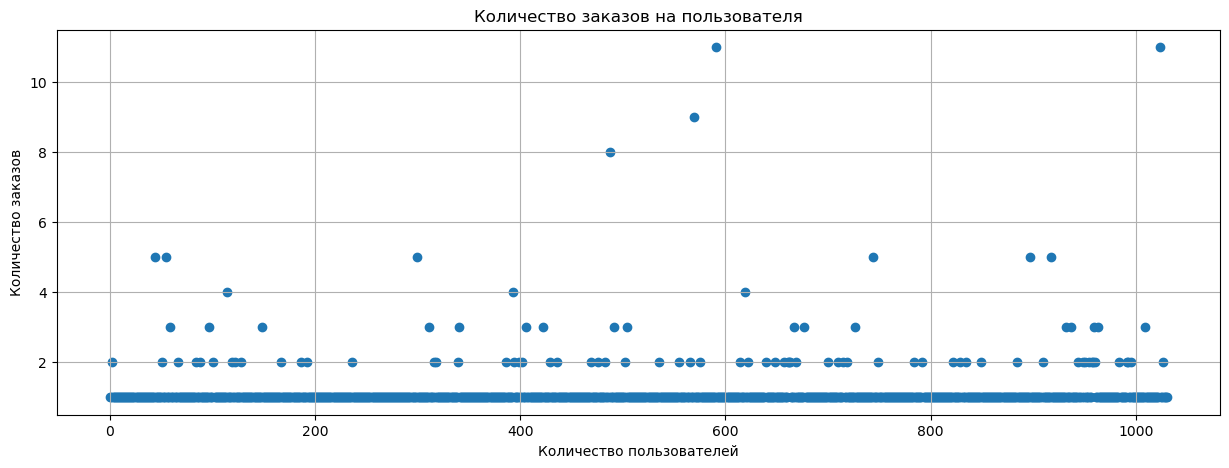

In [84]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize = (15, 5))
plt.grid(True)
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show();
# построим точечный график количества заказов

**Вывод:**  
По графику рассеяния количества заказов видно, что пользователи с количеством заказов более 4 малочислены. Для уточнения считать ли этих пользователей аномальными рассчитаем перецентили.

In [54]:
np.percentile(ordersByUsers['orders'], [90, 95, 99]) #расчитаем перецентили количества заказов

array([1., 2., 4.])

После расчета перцентилей видно, что 99% пользователей заказывали менее 4 и менее заказов. Принимаем, что количество  
заказов более 4 аномальные.

#### расчет количества выручки на пользователя

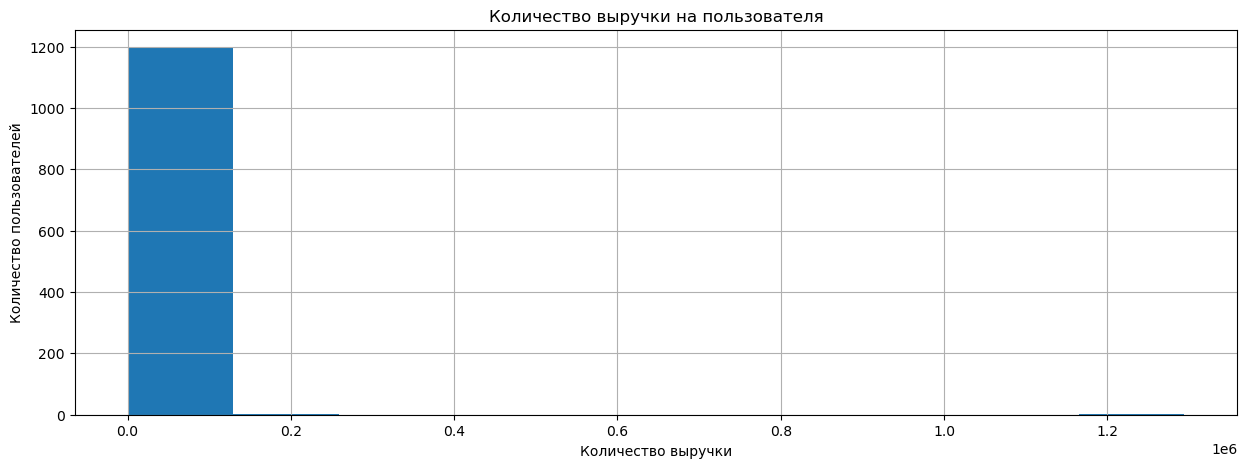

In [85]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.hist(orders['revenue'])
plt.title('Количество выручки на пользователя')
plt.xlabel('Количество выручки')
plt.ylabel('Количество пользователей')
plt.show()
#построим гистограмму выручки

По гистограмме видно, что большинство пользователей заказали на сумму менее 20000.

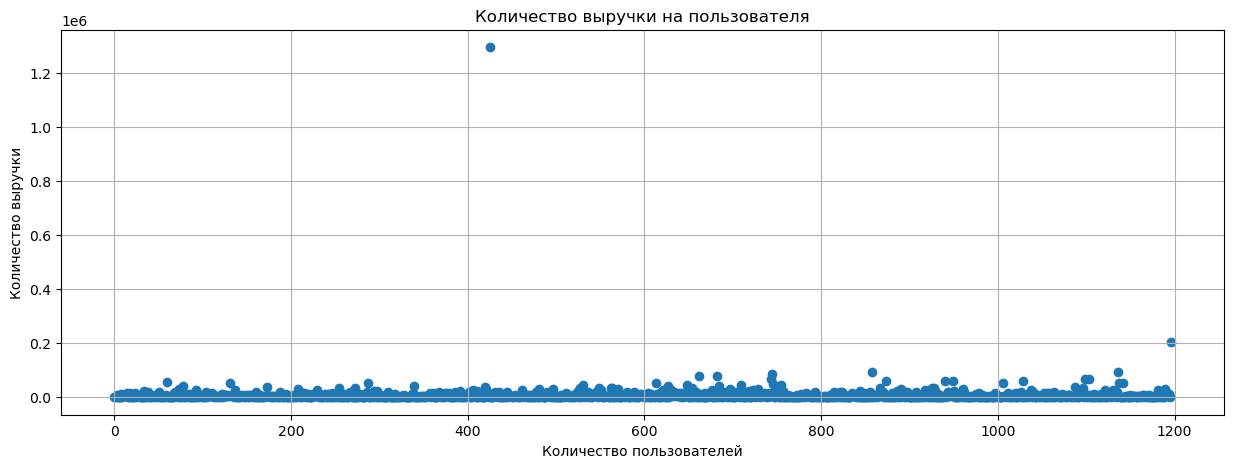

In [86]:
plt.figure(figsize = (15,5))
plt.grid(True)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Количество выручки на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество выручки')
plt.show();

**Вывод:**
По графику рассеяния как и по гистограмме видно, что абсолютное число пользователей сделало заказ менее чем на 20000;


Построим график рассеяния количества выручки на пользователя с фильтрацией выручки до 40000

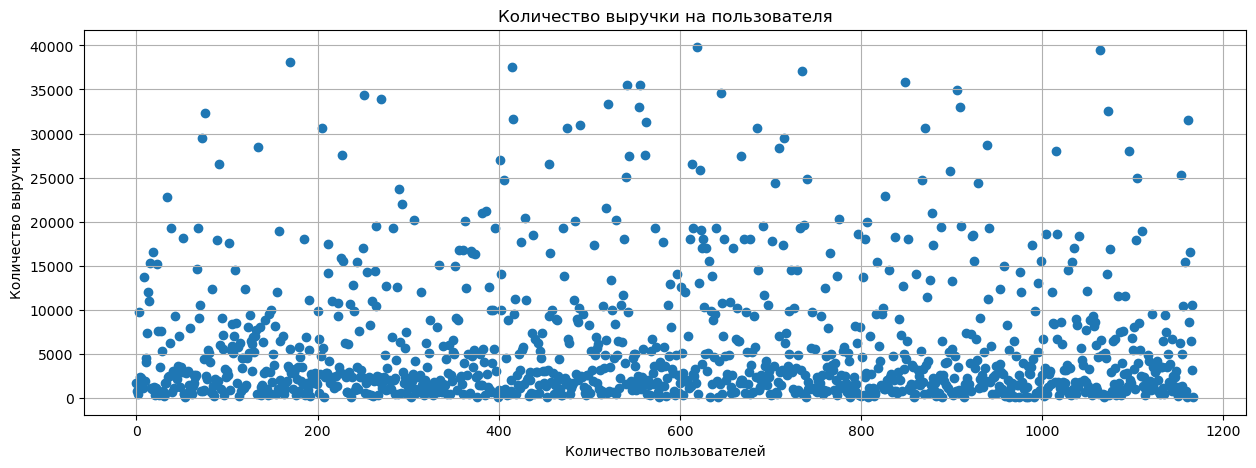

In [87]:
plt.figure(figsize = (15,5))
plt.grid(True)
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 40000]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < 40000]['revenue'])
plt.title('Количество выручки на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество выручки')
plt.show();

**Вывод:**
После фильтрации на графике видно, что наибольшая плотность пользователей ниже границы 20000 выручки

In [58]:
np.percentile(orders['revenue'], [90, 95, 99]) #расчитаем перцентили выручки

array([18168. , 28000. , 58233.2])

**Вывод:**
После расчета перцентилей видно, что 90% пользователей сделали заказы на сумму менее 18168. Будем считать, что заказы дороже 20000 аномальные

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформируем две гипотезы: 
1. Нулевая гипотеза: различия в среднем количестве заказов между группами отсутствуют;
2. Альтернативная гипотеза: различия в среднем количестве заказов между группами есть;

Посчитаем количество ежденевное количество пользователей для группы A

In [59]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

Посчитаем ежедневное количество пользователей с накоплением в группе A 

In [60]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

Посчитаем ежедневное количество пользователей в группе B

In [61]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Посчитаем ежедневное количество пользователей в группе B c накоплением

In [62]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Посчитаем ежедневное количество заказов в группе A 

In [63]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Посчитаем ежедневное количество пользователей в группе A c накоплением

In [64]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

Посчитаем ежедневное количество заказов в группе B

In [65]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Посчитаем ежедневное количество заказов в группе B c накоплением

In [66]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Сведем все данные о количествое пользователей и заказах в один датафрейм

In [67]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


Посчитаем количество заказов на пользователя в группе A

In [68]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

Посчитаем количество заказов на пользователя в группе B

In [69]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Сопоставим пользователей с заказами в группе A 

In [70]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))\
, name='orders')],axis=0)

Сопоставим пользователей с заказами в группе B

In [71]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
name='orders')],axis=0)

Для проверки нулевой гипотезы о равенстве количествва заказов в группах применим критерий Манн-Уитни и посчитаем относительный
проигрыш группы A к B.

In [72]:
alpha = 0.05
stats_orders = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p_value ='' '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if alpha < stats_orders:
    print('Нулевая гипотеза принята')
else:
    print('нулева гипотеза отвергнута')
print('Относительный проигрыш группы A:'' '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p_value = 0.017
нулева гипотеза отвергнута
Относительный проигрыш группы A: 0.138


**Вывод:**
По результатам отвергаем нулевую гипотезу, о равенстве количества заказов в группах и принимаем первую гипотезу.
Так же видим пригрыш группы A на 13% процентов. 

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформируем две гипотезы: 
1. Нулевая гипотеза: различия в среднем количестве выручки между группами отсутствуют;
2. Альтернативная гипотеза: различия в среднем количестве выручки между группами есть;

Для проверки нулевой гипотезы о равенстве выручки в группах применим критерий Манн-Уитни и посчитаем относительный
проигрыш группы A к B.

In [73]:
alpha = 0.05
stats_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p_value ='' ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if alpha < stats_revenue:
    print('Нулевая гипотеза принята')
else:
    print('нулева гипотеза отвергнута')
print('Относительный проигрыш группы A:'' '"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value = 0.729
Нулевая гипотеза принята
Относительный проигрыш группы A: 0.259


**Вывод:**
По результатам применения критерия принимаем нулевую гипотезу о равенстве выручки между группами. Проигрыш группы A составляет 25%, что видимо вызвана дисбалансом групп

#### Фильтрация данных от аномальных пользователей

In [74]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
) #создадим объект с пользователями с заказами менее 4

In [75]:
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId'] #отфильтруем пользователей с заказми дороже 20000
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
) #создадим объект с аномальными пользователями
print(abnormalUsers.head(5)) #выведим 5 первых строк аномальных пользователей
print(abnormalUsers.shape[0])#выведим размер объекта с аномальными пользователями

568     113298937
1099    148427295
461     154576532
928     204675465
684     358944393
dtype: int64
86


Количество аномальных пользователей, составленных по нашим критериям составляет 86.

Проведем проверку гипотез с отфильтрованными данными

In [76]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) #cопоставим посльзователей после фильтрации аномалий с заказами для группы A

In [77]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) #cопоставим посльзователей после фильтрации аномалий с заказами для группы B

Повторим проверку гипотез для отфильтрованных данных: 
1. Нулевая гипотеза: различие в среднем количестве заказов между группами отсутвтует;
2. Альтернативная гипотеза: различие в среднем количестве заказов между группами присутствуют;

In [78]:
alpha = 0.05 
stats_orders_filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p_value ='' ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
if alpha < stats_orders_filtered:
    print('Нулевая гипотеза принята')
else:
    print('нулева гипотеза отвергнута')
print('Относительный проигрыш группы A:'' ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))



p_value = 0.023
нулева гипотеза отвергнута
Относительный проигрыш группы A: 0.149


Нулевая гипотеза об отсутвии различий в среднем количестве заказов между группами отвергнута, значит принимаем первую гипотезу
о наличии различий. Результаты теста с отфильтрованными данными совпадают с результатми теста с "сырыми" данными. Относительный проигрыш группы A увеличился с 13 % до 14% после фильтрации.

Проверим гипотезы на отфильтрованных данных:
1. Нулевая гипотеза: различия в среднем количестве выручки между группами отсутствуют;
2. Альтернативная гипотеза: различия в среднем количестве выручки между группами есть;

In [79]:
sampleAFiltered_Revenue =  orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'] #отфильтруем аномальных пользователей для группы A

In [80]:
sampleBFiltered_Revenue   =  orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'] #отфильтруем аномальных пользователей для группы B

In [88]:
alpha = 0.05 
stats_revenue_filtered = stats.mannwhitneyu(sampleAFiltered_Revenue, sampleBFiltered_Revenue)[1]
print('p_value ='' ''{0:.3f}'.format(stats_revenue_filtered))
if alpha < stats_revenue_filtered:
    print('Нулевая гипотеза принята')
else:
    print('Нулевая гипотеза отвергнута')
print('Относительный проигрыш группы A:' ' ' "{0:.3}".format(sampleBFiltered_Revenue.mean()/sampleAFiltered_Revenue.mean()-1))

p_value = 0.866
Нулевая гипотеза принята
Относительный проигрыш группы A: -0.00166


По результатам теста принимаем нулевую гипотезу о равенстве выручки двух групп. Результаты теста с отфильтрованными данными
совпадают с результатами теста с "сырыми данными". Отнсительный проигрыш группы A сократился до нуля.

### Вывод:

1. приоритизировали гипотезы при помощи фремйворков ICE и RICE:
  - применив фреймворк ICE получили, что наиболее приоритетны гипотезы №8, №0 и №7;
  - применив фреймворк RICE, учитывющий охват пользователей, получили иное распредение приоритетов: №7, №2 и № 0
2. Для проведения A/B теста: 
- провели предобработку данных: 
  - привели данные датафреймов orders и visitors к необходимому формату;
  - оценили размерность групп;
  - проверили на явные дубликаты;
- расчитали и построили график куммулятивных значений выручки для двух групп. По графику определили, что группа B имеет лучшую динамику, по сравнению с группой A, а так же что вероятно в группе B имеются вбросы аномальных значений в период от 17-08 до 21-08; 
- рассчитали и построили график значений куммулятивного среднего чека для двух групп и определили, что группа B также имеет лучшую динамику по сравнению с группой B.
- рассчитали и построили график относительного изменения куммулятивного среднего чека. График показывает значительный перевес в сторону группы B;
- Рассчитали и построили график количества заказов на посетителя по группам. По графику в начальный период в двух группах видны значительные коллебания, затем наблюдется заметный рост показателя группы B и стабилизация его значений, при отрицательной динамике группы A c последующей аналогичной стабилизацией;
- рассчитали и построили график относительного изменения количества заказов на посетителя. График показал превосходство группы B;
- рассчитали количество заказов на пользователя, построили гистограмму распределения заказов, точечный график заказов, и определили перцентили показателя. В результате определили, что пользователями с заказами более 4 будем считать аномальными.
- рассчитали количество выручки на пользователя, построили гистограмму распределения выручки, точечный график заказов и определили перцентили показателя. В результате определили, что анамальными пользователями будем считать с выручкой более 20000;
- Для проведения теста на данных без исключения аномальных пользователей сформировали гипотезы и применили критерий Манн-Уитни: 
  - для расчета статистической значимости в среднем чеке между группами:  
     1.H0 -  различия в среднем количестве заказов между группами отсутствуют;  
     2.H1 -  различия в среднем количестве заказов между группами присутсвуют.  
     
       в результате расчета отвергнули нулевую гипотезу и приняли первую.  
     
     
  - для расчета статистической разницы среднего чека между группами: 
     1. H0 -  Нулевая гипотеза: различие в среднем количестве заказов между группами отсутвтует;
     2. H1 -  различия в среднем количестве заказов между группами присутсвуют.  
   
        в результате расчета приняли первую гипотезу.  
      

    
- После фильтрации аномальных пользователей и формулирования аналогичных гипотез получили аналогичные результаты:
     - отвергли гипотезу об отсутвии статистической разницы в среднем количестве заказов между группами и приняли гипотезу о присутствии статистической разницы в среднем количестве заказов между группами;  
     - приняли гипотезу об отсутвии статистической разницы в среднем чеке между группами. 

**Проанализировав полученные данные и несмотря на то, что приняли гипотезу об отсутвии статистической разницы между группами в среднем чеке, можно остановить тест и признать его успешным, так как видны положительные результаты по показателям группы B**.